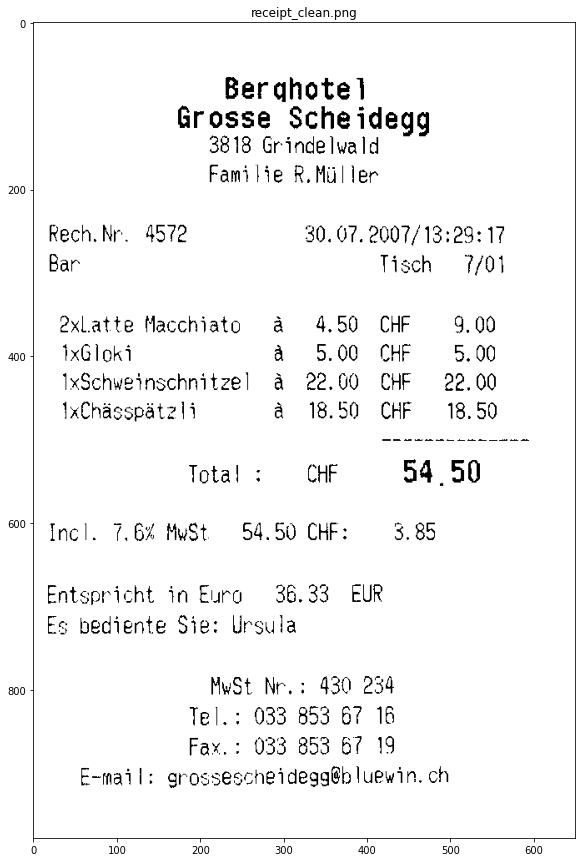

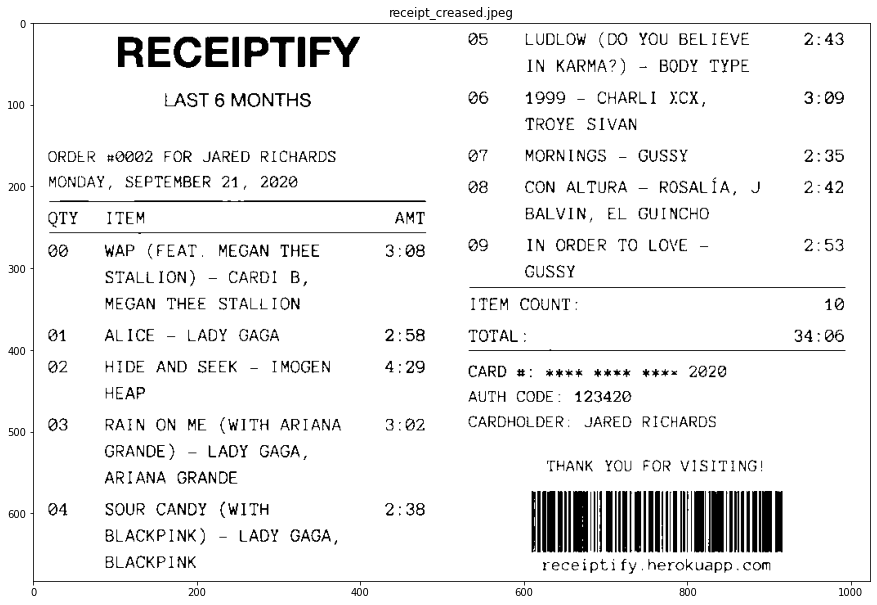

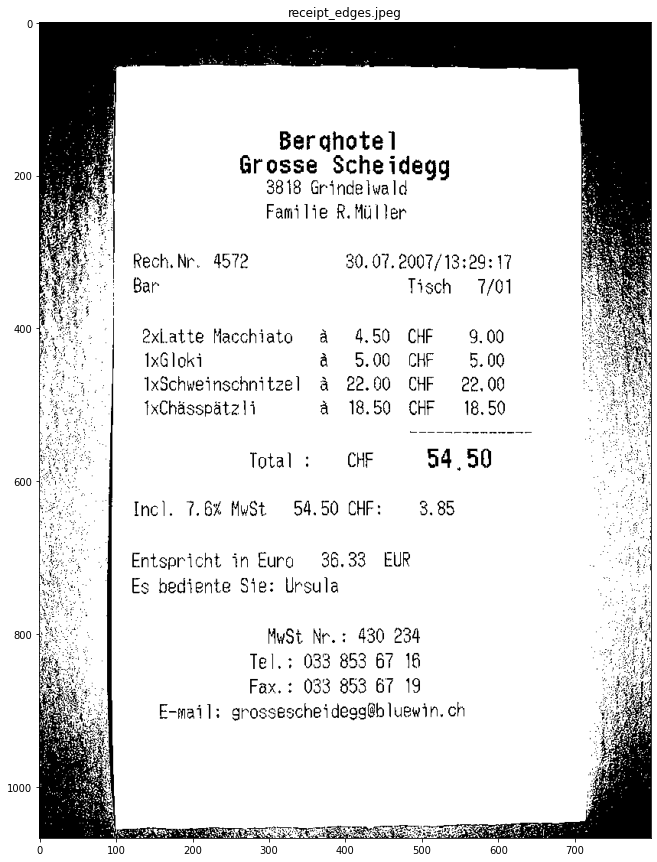

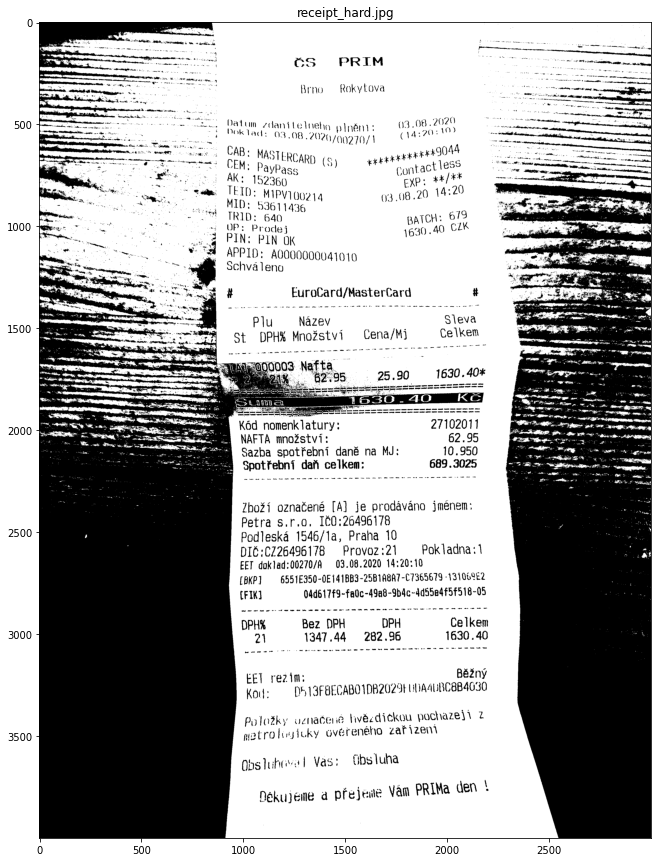

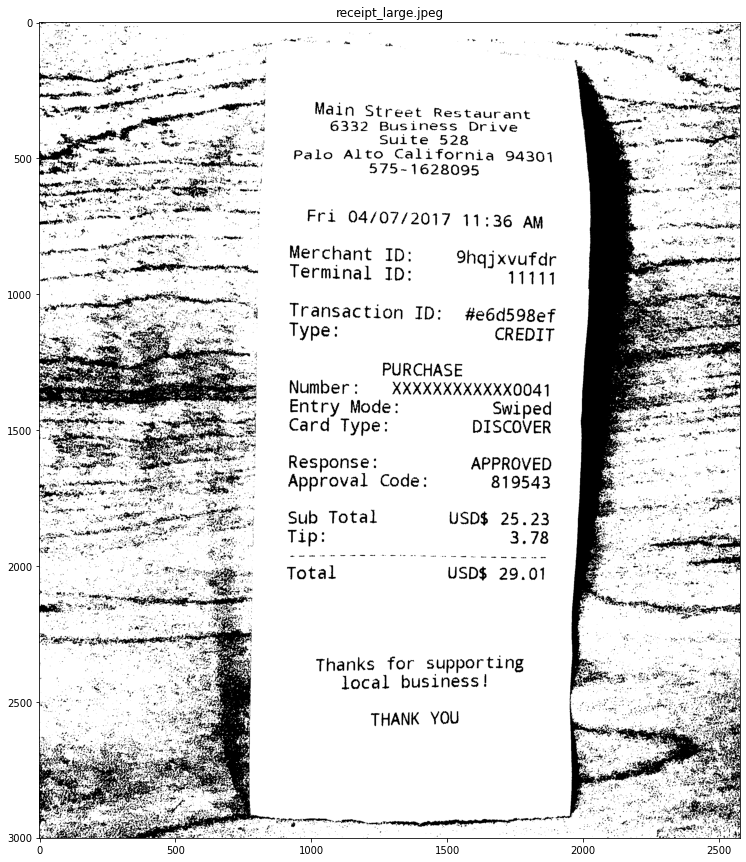

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

images = ['receipt_clean.png', 'receipt_creased.jpeg', 
          'receipt_edges.jpeg', 'receipt_hard.jpg', 'receipt_large.jpeg']

for image in images:
    # Read the image
    img = cv2.imread(f'images/{image}',0)
    # Simple thresholding
    ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    plt.figure(figsize = (15,15))
    plt.title(image)
    plt.imshow(thresh1,'gray')
    plt.show()

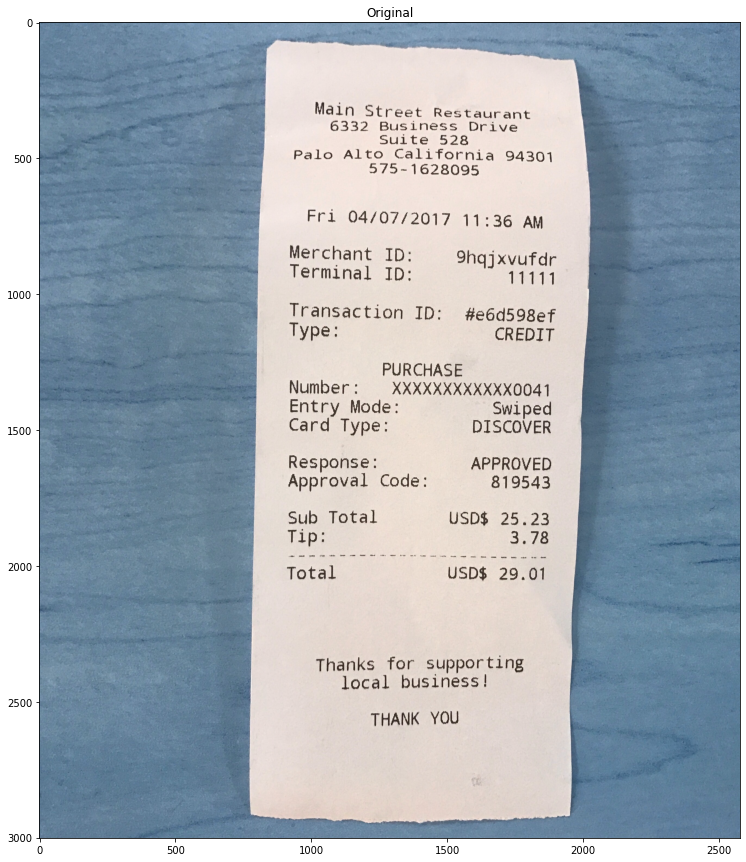

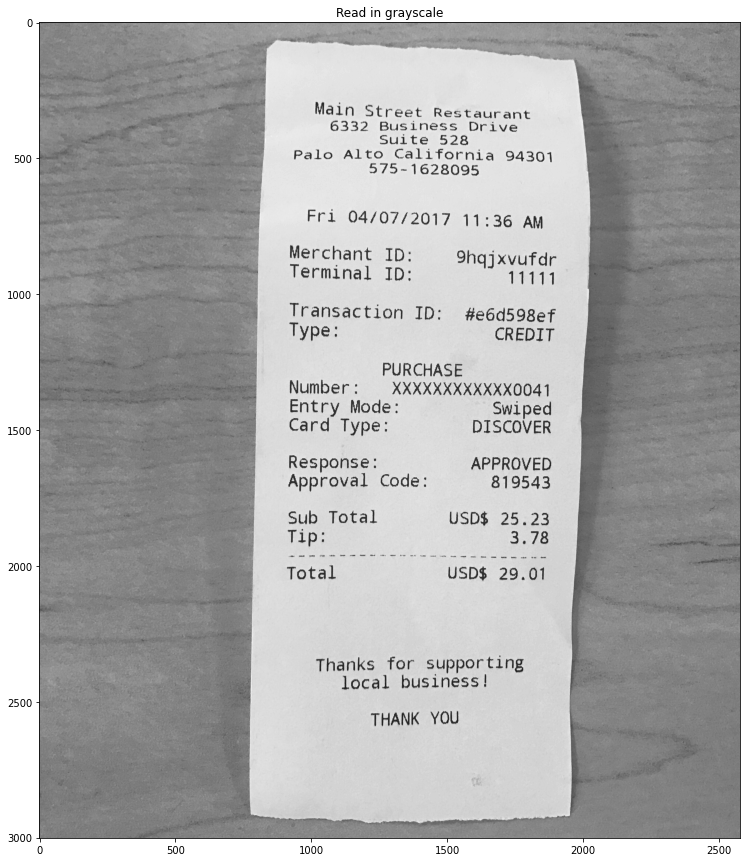

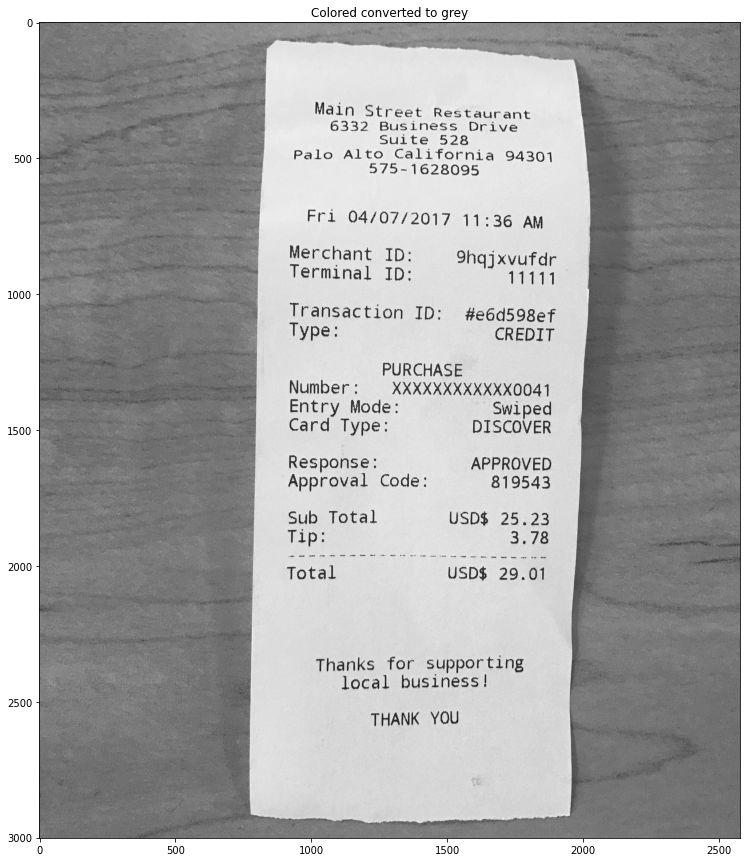

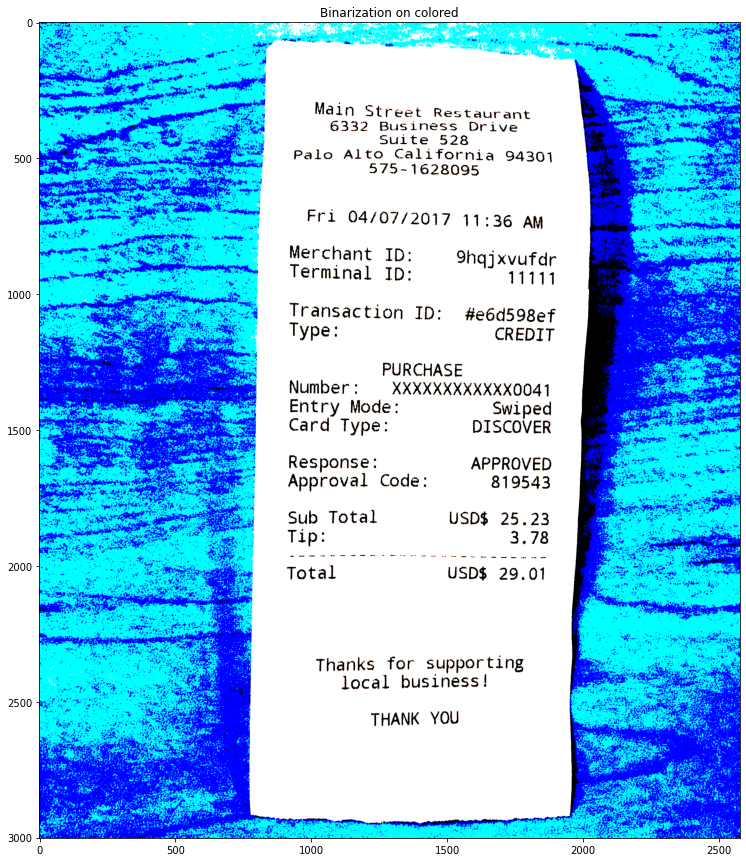

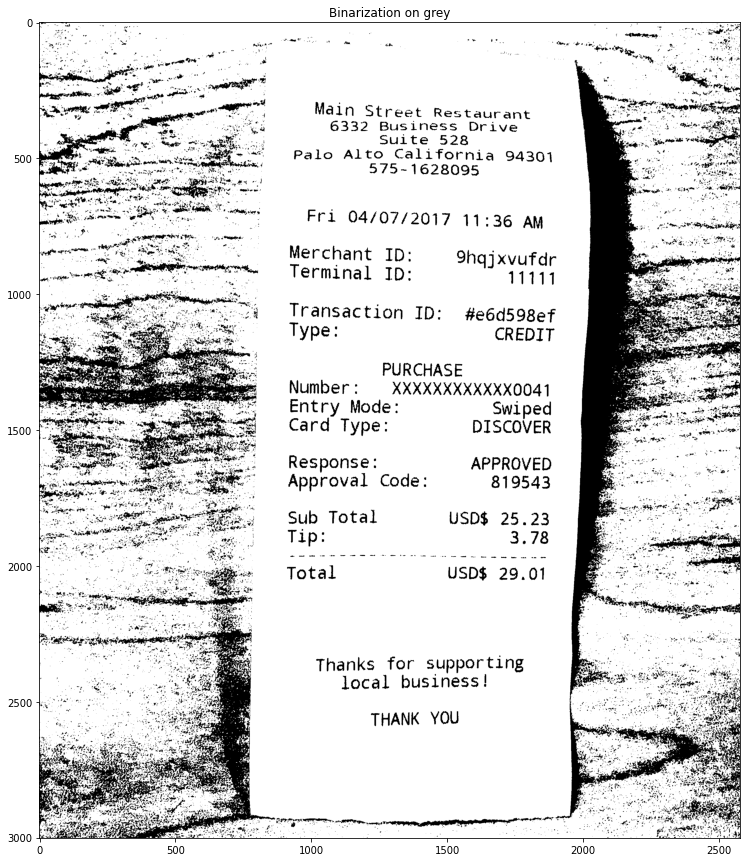

In [2]:
img_color = cv2.imread('images/receipt_large.jpeg')
plt.figure(figsize = (15,15))
plt.title("Original")
plt.imshow(img_color)
plt.show()

img_grey = cv2.imread('images/receipt_large.jpeg',0)
plt.figure(figsize = (15,15))
plt.title("Read in grayscale")
plt.imshow(img_grey,'gray')
plt.show()

# it is the same as reading it in grey
gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
plt.figure(figsize = (15,15))
plt.title("Colored converted to grey")
plt.imshow(gray,'gray')
plt.show()

ret,th1 = cv2.threshold(img_color,127,255,cv2.THRESH_BINARY)
plt.figure(figsize = (15,15))
plt.title("Binarization on colored")
plt.imshow(th1)
plt.show()

ret,th2 = cv2.threshold(img_grey,127,255,cv2.THRESH_BINARY)
plt.figure(figsize = (15,15))
plt.title("Binarization on grey")
plt.imshow(th2,'gray')
plt.show()

121.0
122.0


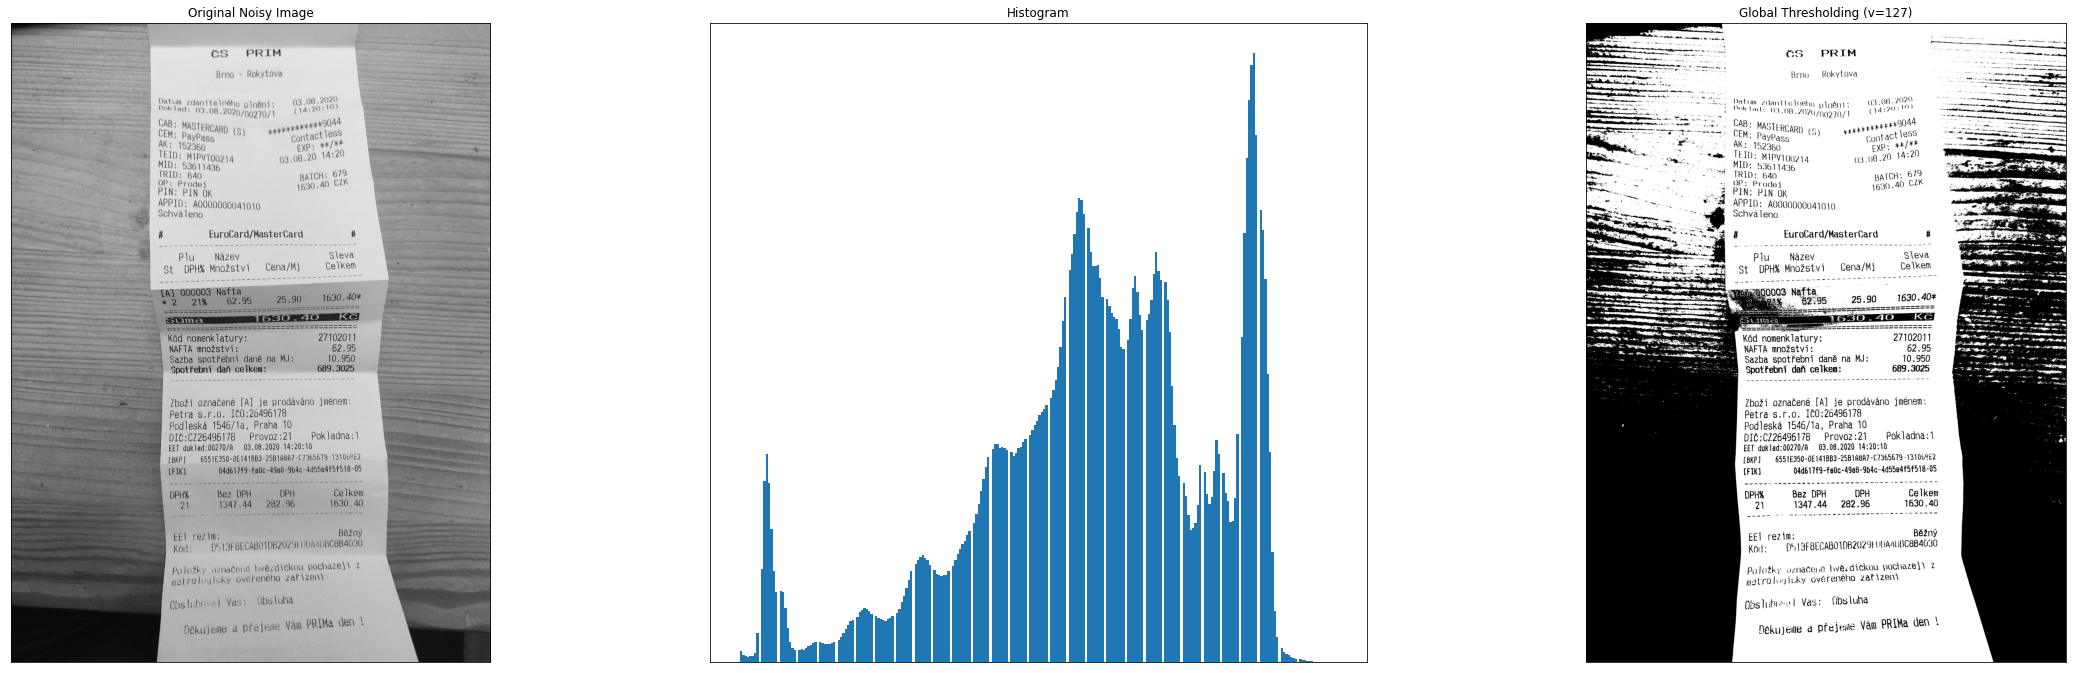

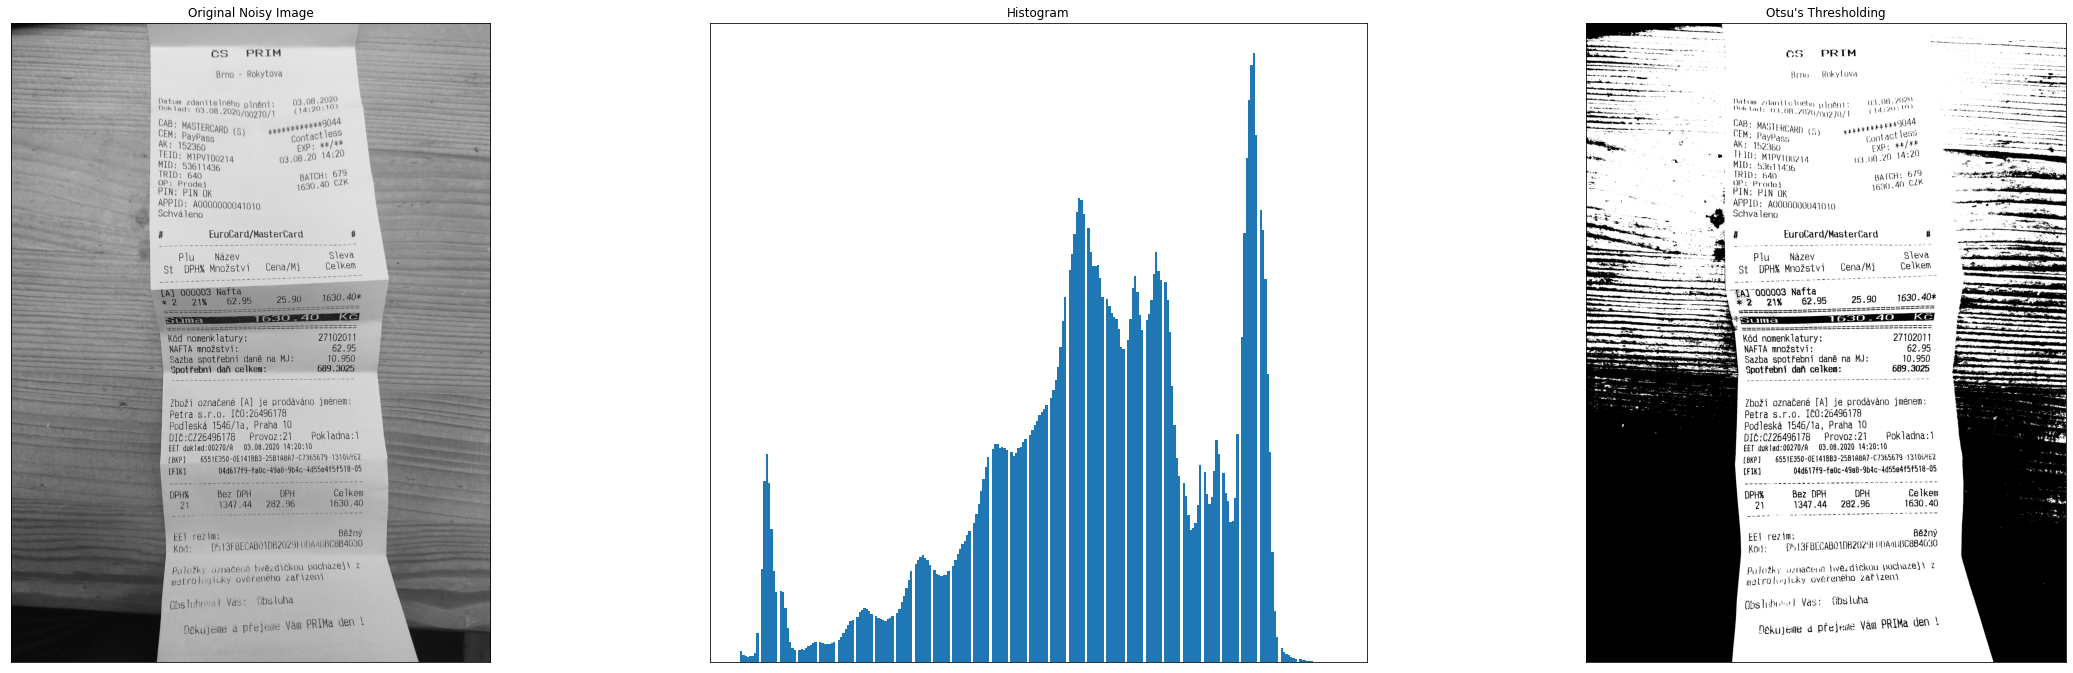

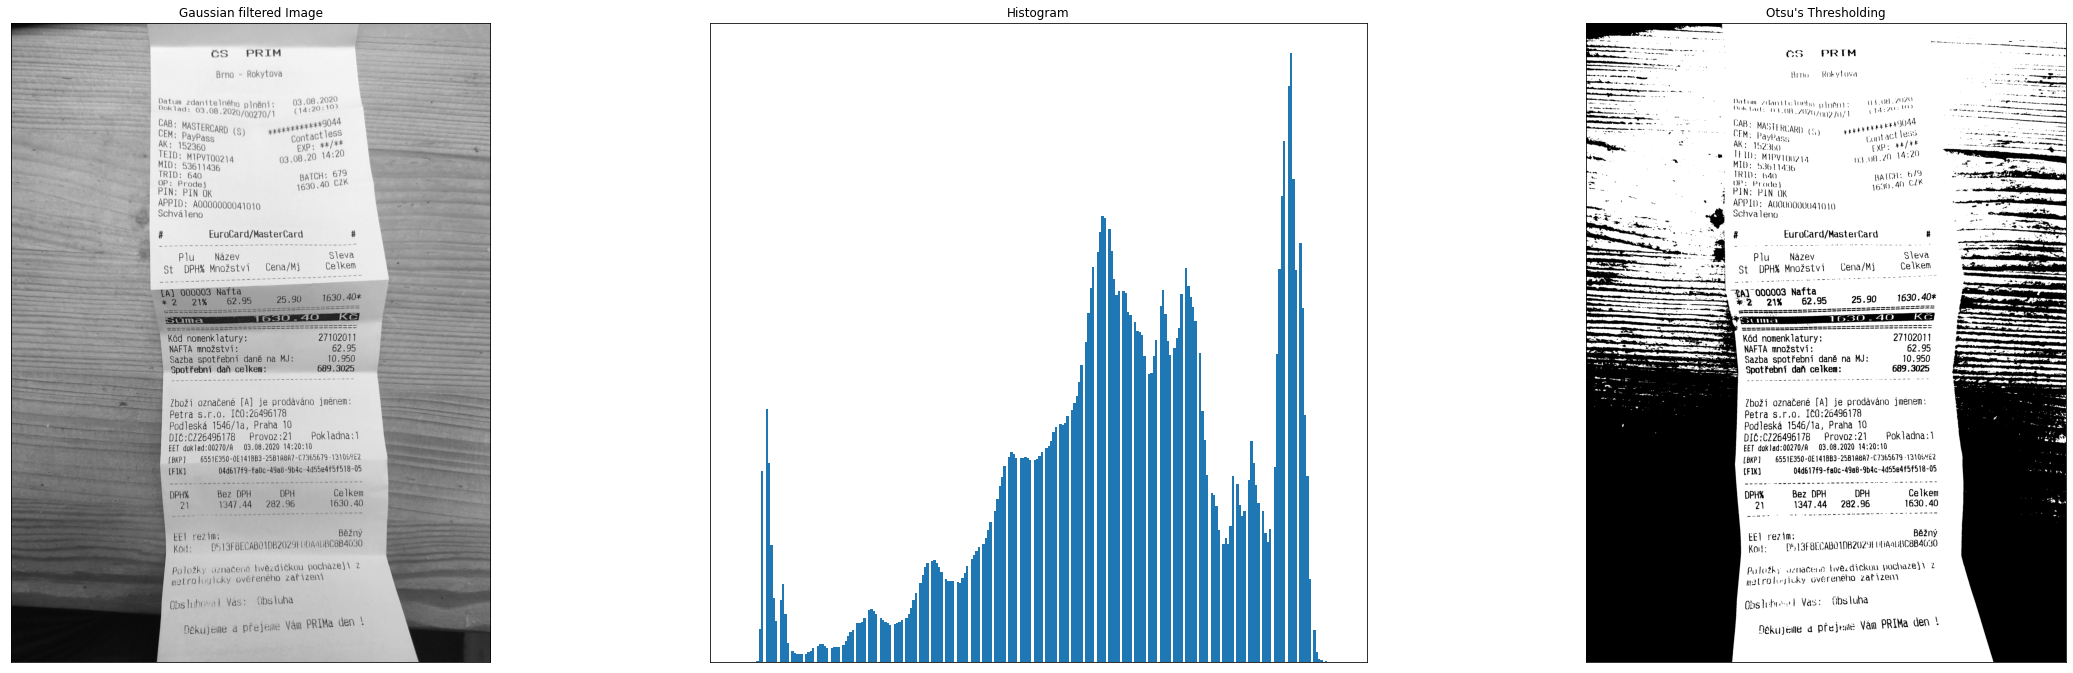

In [3]:
img = cv2.imread('images/receipt_hard.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret2)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret3)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.figure(figsize = (40,40))    
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()